In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
%matplotlib inline


In [4]:
df = pd.read_csv('data/Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3353,4536-PLEQY,Male,0,Yes,No,12,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.05,999.8,No
6065,4458-KVRBJ,Male,0,No,No,59,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.00,1510.5,No
692,9620-QJREV,Male,0,No,Yes,47,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.55,1013.05,No
4908,3957-LXOLK,Female,1,No,No,28,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.15,3152.5,Yes
832,3487-EARAT,Female,0,Yes,Yes,70,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),74.10,5222.3,No


In [5]:
df.drop('customerID', axis='columns', inplace=True)

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [16]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [17]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [18]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [19]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [20]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [22]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

/tmp/ipykernel_253843/695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [23]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [31]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure


Text(0.5, 1.0, 'Customer Churn Prediction Visualization')

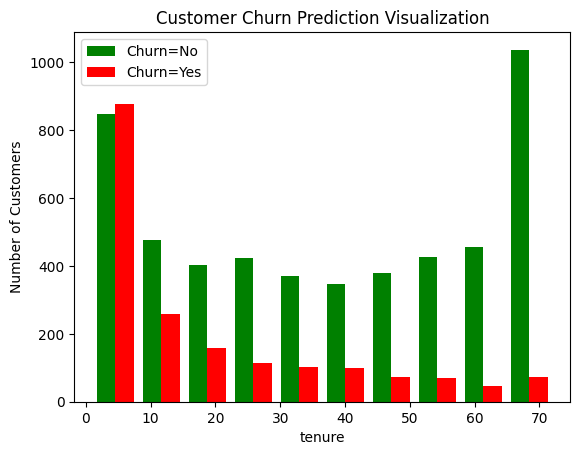

In [37]:
plt.hist([tenure_churn_no, tenure_churn_yes], color=['green','red'], label=['Churn=No','Churn=Yes'])
plt.legend()
plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

In [42]:
def print_unique_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [49]:
print_unique_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [46]:
df1 = df1.replace('No internet service', 'No')
df1.shape

(7032, 20)

In [48]:
df1 = df1.replace('No phone service', 'No')
df1.shape

(7032, 20)

In [75]:
yes_no_columns=['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                'PaperlessBilling', 'MultipleLines','Churn']

yes_no_columns

['Partner',
 'Dependents',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MultipleLines',
 'Churn']

In [76]:
for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No': 0}, inplace=True)

/tmp/ipykernel_253843/2537002618.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes':1, 'No': 0}, inplace=True)
/tmp/ipykernel_253843/2537002618.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes':1, 'No': 0}, inplace=True)


In [77]:
df1.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6649,0,0,1,1,6,1,0,No,0,0,0,0,0,0,Month-to-month,0,Credit card (automatic),19.85,138.85,0
6908,0,0,0,1,9,1,0,DSL,0,0,0,0,1,0,Month-to-month,0,Electronic check,55.35,449.75,1
1339,0,0,1,0,66,1,1,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Credit card (automatic),105.00,7133.25,1
4283,0,1,1,0,4,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.20,280.35,0
3436,0,0,0,0,25,1,0,No,0,0,0,0,0,0,One year,1,Bank transfer (automatic),19.50,516.30,0
2762,0,0,0,0,25,1,0,Fiber optic,0,0,1,1,1,1,Two year,0,Bank transfer (automatic),99.30,2513.50,0
1978,1,0,0,0,57,1,0,DSL,0,1,1,1,1,0,Two year,0,Mailed check,69.75,3894.40,0
5106,1,0,0,0,52,1,0,DSL,0,0,1,0,0,1,Month-to-month,1,Electronic check,59.45,3043.70,0
3823,0,0,1,0,72,1,1,DSL,1,1,1,1,0,1,Two year,0,Bank transfer (automatic),78.85,5763.15,0
3045,1,0,1,0,48,1,0,DSL,0,1,1,0,0,1,One year,1,Electronic check,65.65,3094.65,0


In [78]:
print_unique_values(df1)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [79]:
df1['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

In [80]:
df2=pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'], dtype=int)

In [81]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
789,0,0,0,0,72,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
4584,0,1,0,0,69,1,1,1,0,1,...,1,0,0,0,0,1,0,1,0,0
3905,1,0,0,0,3,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
5287,0,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
6894,0,1,1,0,3,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0


In [82]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [83]:
cols_to_scale=['tenure', 'MonthlyCharges', 'TotalCharges']

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4673,1,1,0,0,0.338028,1,1,1,1,0,...,0,1,0,1,0,0,0,0,0,1
5068,1,0,1,0,0.985915,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
5070,0,0,0,1,0.478873,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
6776,1,1,1,0,0.859155,1,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
643,1,1,0,0,0.676056,1,0,0,1,1,...,0,1,0,0,1,0,1,0,0,0


In [86]:
X=df2.drop('Churn', axis='columns')
y=df2['Churn']

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5 )

In [88]:
X_train.shape

(5625, 26)

In [89]:
X_test.shape

(1407, 26)

In [90]:
import tensorflow as tf
from tensorflow import keras

In [126]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/home/nav/Projects/pytrain/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [127]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.7443 - loss: 0.5614
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7939 - loss: 0.4345
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7994 - loss: 0.4207
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8055 - loss: 0.4102
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7949 - loss: 0.4180
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8082 - loss: 0.4064
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8134 - loss: 0.3984
Epoch 8/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8017 - loss: 0.4151
Epoch 9/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8136 - loss: 0.4036
Epoch 10/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8089 - loss: 0.4087
Epoch 11/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8105 - loss: 0.4098
Epoch 12/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/ste

In [128]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7985 - loss: 0.4345


[0.4450434148311615, 0.7889125943183899]

In [129]:
y_pred = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [130]:
y_pred

array([[0.21200922],
       [0.49436566],
       [0.01253675],
       ...,
       [0.7243888 ],
       [0.60895   ],
       [0.6748068 ]], dtype=float32)

In [131]:
def convert_to_label(values):
    for value in values:
        if( value >= 0.5):
            yield 1
        else:
            yield 0

In [132]:
y_pred_labels = list(convert_to_label(y_pred))

In [133]:
y_test[:10].values

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [134]:
y_pred_labels[:10]

[0, 0, 0, 1, 0, 1, 0, 1, 0, 0]

In [135]:
from sklearn.metrics import classification_report, confusion_matrix

In [136]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       999
           1       0.68      0.52      0.59       408

    accuracy                           0.79      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

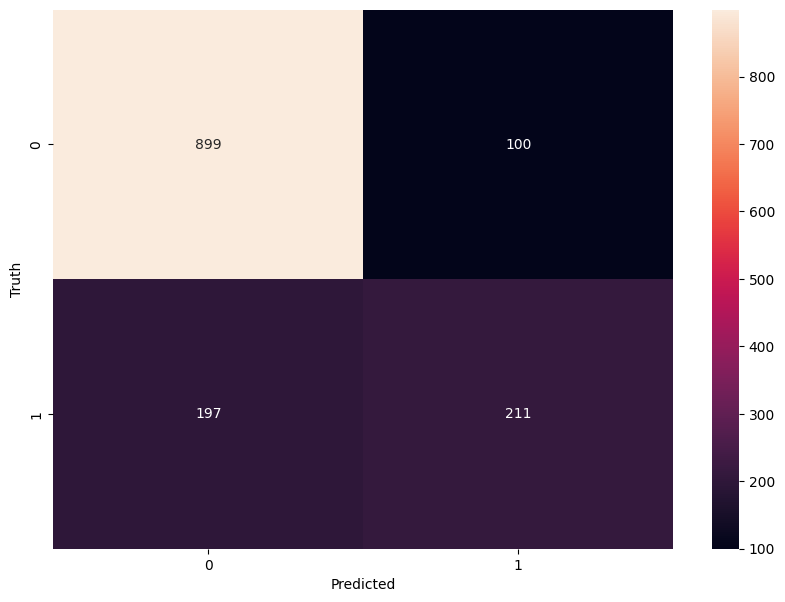

In [137]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
